In [3]:
import os
import numpy as np
import cv2
import json
from pathlib import Path
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import torch
from torchvision.utils import make_grid
import pickle

In [150]:
from matplotlib.pyplot import imshow, figure
import matplotlib as mpl

def view_image(ii, dpi=100, nrow=4):
    mpl.rcParams['figure.dpi'] = dpi
    if len(ii.shape) == 3:        
        imshow(ii)
        return
    t = torch.from_numpy(ii)
    t = t.permute(0, 3, 1, 2)
    n = make_grid(t,padding=4,pad_value=1, nrow=nrow)
    imshow(n.numpy().transpose(1,2,0))

def img_and_mask2(data, center=True):
    img = np.expand_dims(data['image'], axis=0)
    mask = np.expand_dims(data['mask'], axis=-1)
    mask = np.repeat(mask, 3, axis=-1)
    ann = data['objects']
    mask = np.stack([mask]* len(ann))
    for m, a in zip(mask, ann):
        m[m != a['mask_color']] = 0
        m[m == a['mask_color']] = 255
    imgs = np.concatenate((img, mask))
    ii = imgs.copy()
    if center:
        for a in ann:
            x = a['pixel_coords'][0]
            y = a['pixel_coords'][1]
            for i in ii:
                i = cv2.circle(i, (x, y), 2, (255,0,0), 4)
    return ii

def img_and_mask(data, center=True):
    img = data['image']
    mask = np.expand_dims(data['mask'], axis=-1)
    mask = np.repeat(mask, 3, axis=-1)
    ann = data['objects']
    imgs = np.stack([img, mask])
    ii = imgs.copy()
    if center:
        for a in ann:
            x = a['pixel_coords'][0]
            y = a['pixel_coords'][1]
            for i in ii:
                i = cv2.circle(i, (x, y), 2, (255,0,0), 4)
    return ii
    
def view_img_and_mask(data, center=True, dpi=100,nrow=2):
    imgs = img_and_mask(data, center)
    view_image(imgs, dpi, nrow)
        
def view_all(data, aggregated=True,center=True, dpi=100, nrow=2):
    if aggregated:
        method = img_and_mask
    else:
        method = img_and_mask2
        
    imgs = []
    topview = method(data['topview'],center)
    imgs.append(topview)
    for d in data['views']:
        imgs.append(method(d, center))
    imgs = np.concatenate(imgs)
    view_image(imgs, dpi,nrow)

rootpath = Path('/data/private/work/gqn/datasets/clevr-dataset-gen/image_generation/output/0')


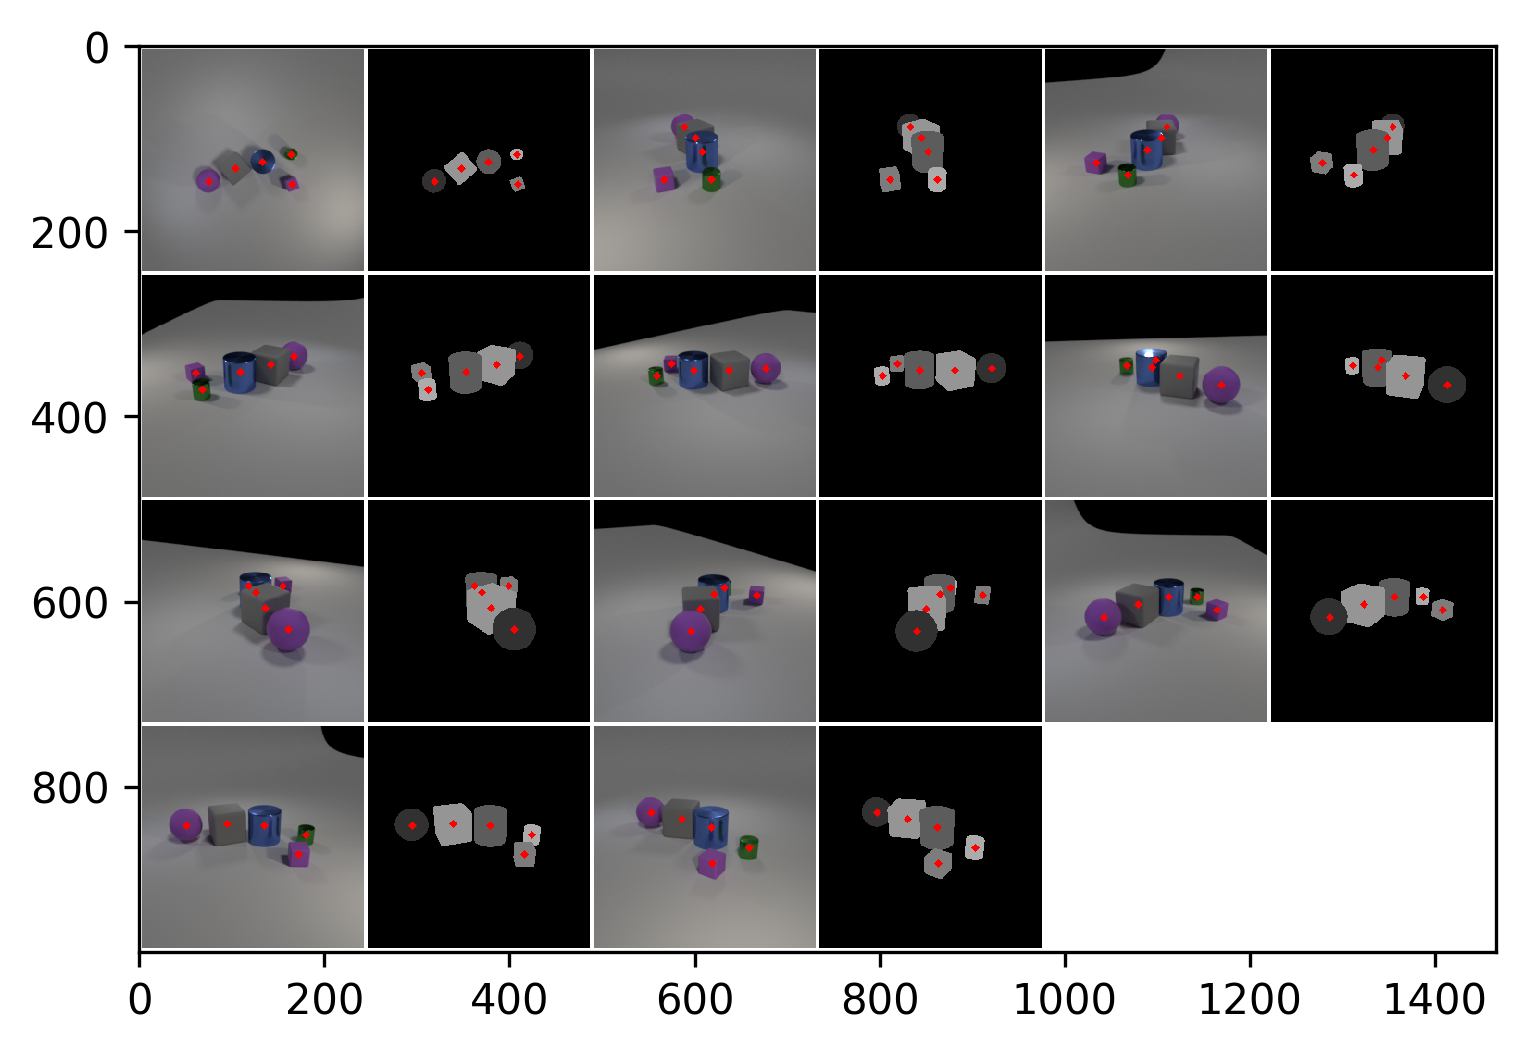

In [155]:
idx = 1
datapath = rootpath / '{}.pkl'.format(idx)
with open(datapath, 'rb') as f:
    scene = pickle.load(f)
view_all(scene, True, True, dpi=300,nrow=6)